In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, WeekdayLocator
from matplotlib import rc
import seaborn as sns
import numpy as np
import re

# Window
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# Mac
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# 유저 데이터
user = pd.read_csv('./data/user_infos/2024PASS_S1/user_infos_10000.csv')
# user = user.rename(columns={'character_ids':'characterId'})

# 유저 크리쳐 데이터
creature_info = pd.read_csv('./data/creature/active_creature_infos.csv')

In [13]:
df = pd.read_csv('./data/creature/user_creature_data_0425.csv').drop_duplicates()

### 추가적 분석이 필요한 부분 0315

- 유저 데이터 중 명성이 3만이 넘는 데이터 55만 / 즉 6만 데이터는 3만 이하의 캐릭터들이 존재
- 이 부분에 대해서 다시 분석할 것인가에 대해서는 고민이 필요함. 고스팩 유저가 아니라 점점 저스팩으로 간다는 데이터가 포함되어 있기 때문에


In [4]:

# fame under 30000
fame_filter = user[user['char_fame'] < 30000]['characterId'].values

In [5]:
df = df[~df['characterId'].isin(fame_filter)]

In [6]:
df['itemName'].nunique()

724

In [7]:
df['clone_itemName'].nunique()

831

In [8]:
df.head()

,Unnamed: 0,serverId,characterId,itemId,itemName,itemRarity,clone_itemId,clone_itemName
0,0,cain,0cb7b947cdc7aa473149c3f12fd33421,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,cefc6a7af4bb9eead3f93dce5275bd1d,SD 태초의 세리아
1,1,bakal,3132c25f5767863cabb2131d44fb476d,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,35c828acea28da1278e933f0fd3377d6,SD 청룡 히만
2,2,bakal,058d4f0cda76a18aacd280df0eb98253,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,3afa234ef30dd9602359f5daa568ce1b,파핑파핑 8비트 스노우메이지
3,3,cain,4993e4bfbf322bac7a44a86258c23d31,26bfffdcf22964bf2f3c5c2ade313236,SD 땅지기 슈므,레어,9e3cb03a670480a403153851f849efdd,파핑파핑 8비트 여프리스트
4,4,siroco,58b27ccfd3d5e8269d12ce71e9ee6530,b2358abfe3ea375267720b1a9d3dd598,SD 흰 구름 전령 에를리히,레어,b136081859ebc6ac6153208e1a41f77f,파핑파핑 8비트 슈므


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559344 entries, 0 to 604062
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      559344 non-null  int64 
 1   serverId        559344 non-null  object
 2   characterId     559344 non-null  object
 3   itemId          559344 non-null  object
 4   itemName        559344 non-null  object
 5   itemRarity      559344 non-null  object
 6   clone_itemId    119901 non-null  object
 7   clone_itemName  119901 non-null  object
dtypes: int64(1), object(7)
memory usage: 38.4+ MB


In [10]:
df.columns

Index(['Unnamed: 0', 'serverId', 'characterId', 'itemId', 'itemName',
       'itemRarity', 'clone_itemId', 'clone_itemName'],
      dtype='object')

In [11]:
equ_creature = df[['serverId', 'characterId', 'itemId', 'itemName']]

In [12]:
clone_creature = df[['serverId', 'characterId', 'clone_itemId', 'clone_itemName']]

In [13]:
equ_creature['itemName'].value_counts()[:20]

itemName
SD 흰 구름 전령 에를리히            187596
순백의 나비 공주                  114420
축제의 여왕 페리아                  48486
WON'S 다정한 SD 세리아 Ver.2      31503
다정한 SD 세리아 Ver.2            25687
쁘띠 폭룡왕 바칼                   22356
[EVENT]다정한 SD 세리아 Ver.2     18216
SD 신부 세리아                   10809
SD 땅지기 슈므                    9939
SD 가이드 히만 스텔라                7624
SD 히만 스텔라                    7303
디자이너 엘레나[노련한]                4404
SD 호랑 세리아                    4096
달의 수호자 야나[노련한]               2990
SD 흰 구름 전령 에를리히[기간제]         2914
태양의 수호자 키르케[노련한]             2902
순수한 인디언 소녀[노련한]              2373
SD 베리아스                      1750
SD 태초의 세리아                   1597
RB Ver.P                     1585
Name: count, dtype: int64

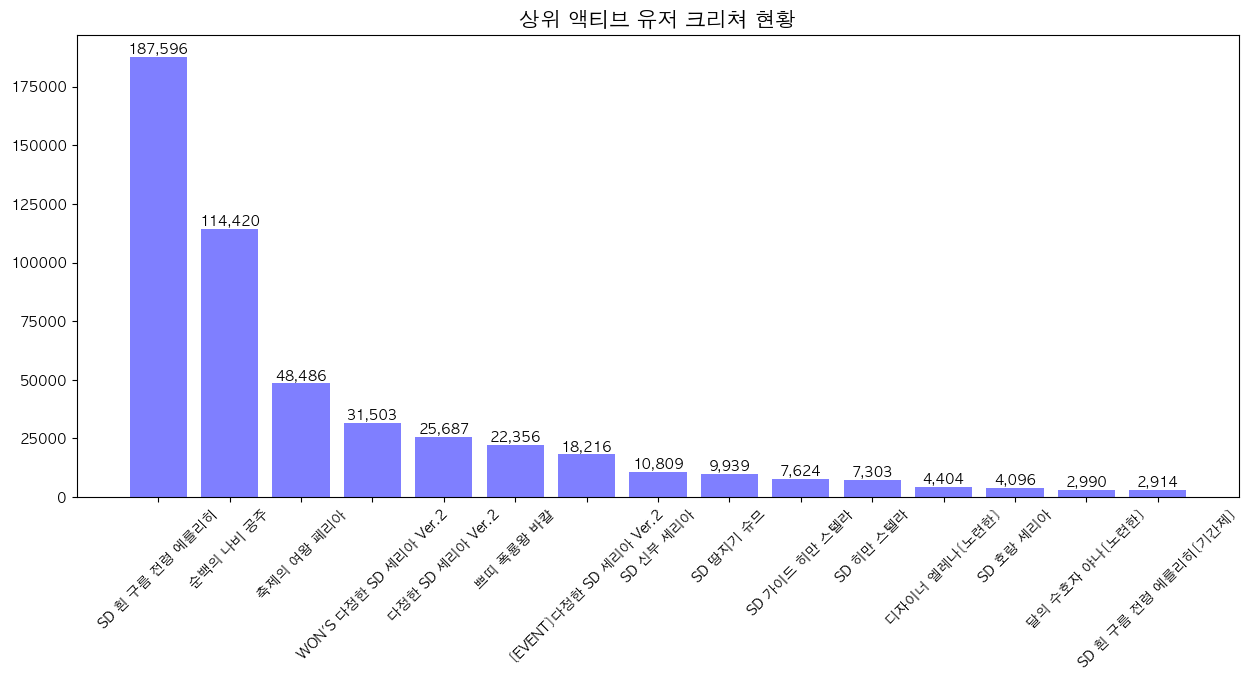

In [14]:
cnt_df = pd.DataFrame(equ_creature['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
plt.bar(x_label, y_label, color='b', alpha = 0.5)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.title('상위 액티브 유저 크리쳐 현황', fontsize=15)
plt.xlabel('')
plt.ylabel('')

plt.show()

In [15]:
cnt_df['ratio'] = round(cnt_df['cnt']/cnt_df['cnt'].sum(),3)
print(f'총 캐릭터 수 : {len(df):,}')
print(f"크리처 보유 캐리 수 : {len(df[~df['itemName'].isna()]):,}")
print(f'크리처 종류 : {len(cnt_df):,}')
print(f"상위 15개 항목 : {cnt_df[:15]['cnt'].sum():,} ({cnt_df[:15]['ratio'].sum()})")
cnt_df[:15]

총 캐릭터 수 : 559,344
크리처 보유 캐리 수 : 559,344
크리처 종류 : 724
상위 15개 항목 : 498,343 (0.8910000000000001)


,itemName,cnt,ratio
0,SD 흰 구름 전령 에를리히,187596,0.335
1,순백의 나비 공주,114420,0.205
2,축제의 여왕 페리아,48486,0.087
3,WON'S 다정한 SD 세리아 Ver.2,31503,0.056
4,다정한 SD 세리아 Ver.2,25687,0.046
5,쁘띠 폭룡왕 바칼,22356,0.040
6,[EVENT]다정한 SD 세리아 Ver.2,18216,0.033
7,SD 신부 세리아,10809,0.019
8,SD 땅지기 슈므,9939,0.018
9,SD 가이드 히만 스텔라,7624,0.014


In [16]:
# 상위 유저 데이터
user_infos = pd.read_csv('./data/user_infos/2024PASS_S2/user_infos_10000.csv')

# 유저 크리쳐 데이터
creature_info = pd.read_csv('./data/creature/active_creature_infos.csv')

In [17]:
user_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525541 entries, 0 to 525540
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   basejob      525541 non-null  object
 1   subjob       525541 non-null  object
 2   server       525541 non-null  object
 3   char_name    525539 non-null  object
 4   char_fame    525541 non-null  int64 
 5   characterId  525541 non-null  object
dtypes: int64(1), object(5)
memory usage: 24.1+ MB


In [18]:
# 상위 10,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:10000]['characterId'].values

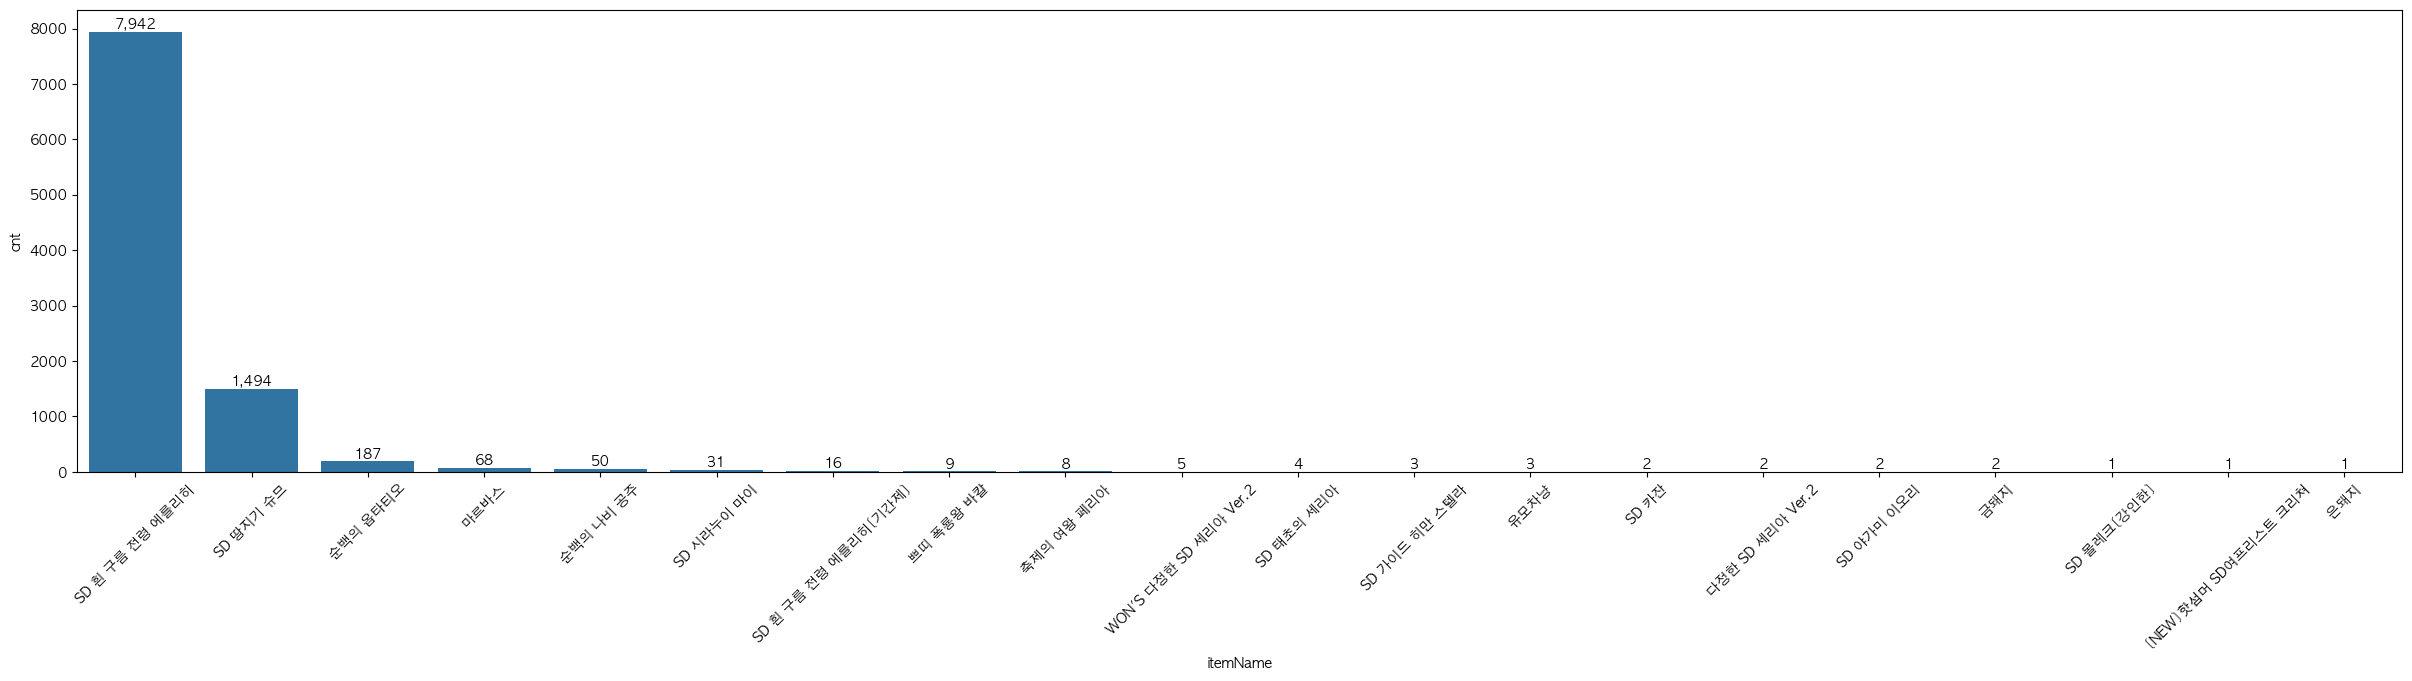

In [19]:
cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

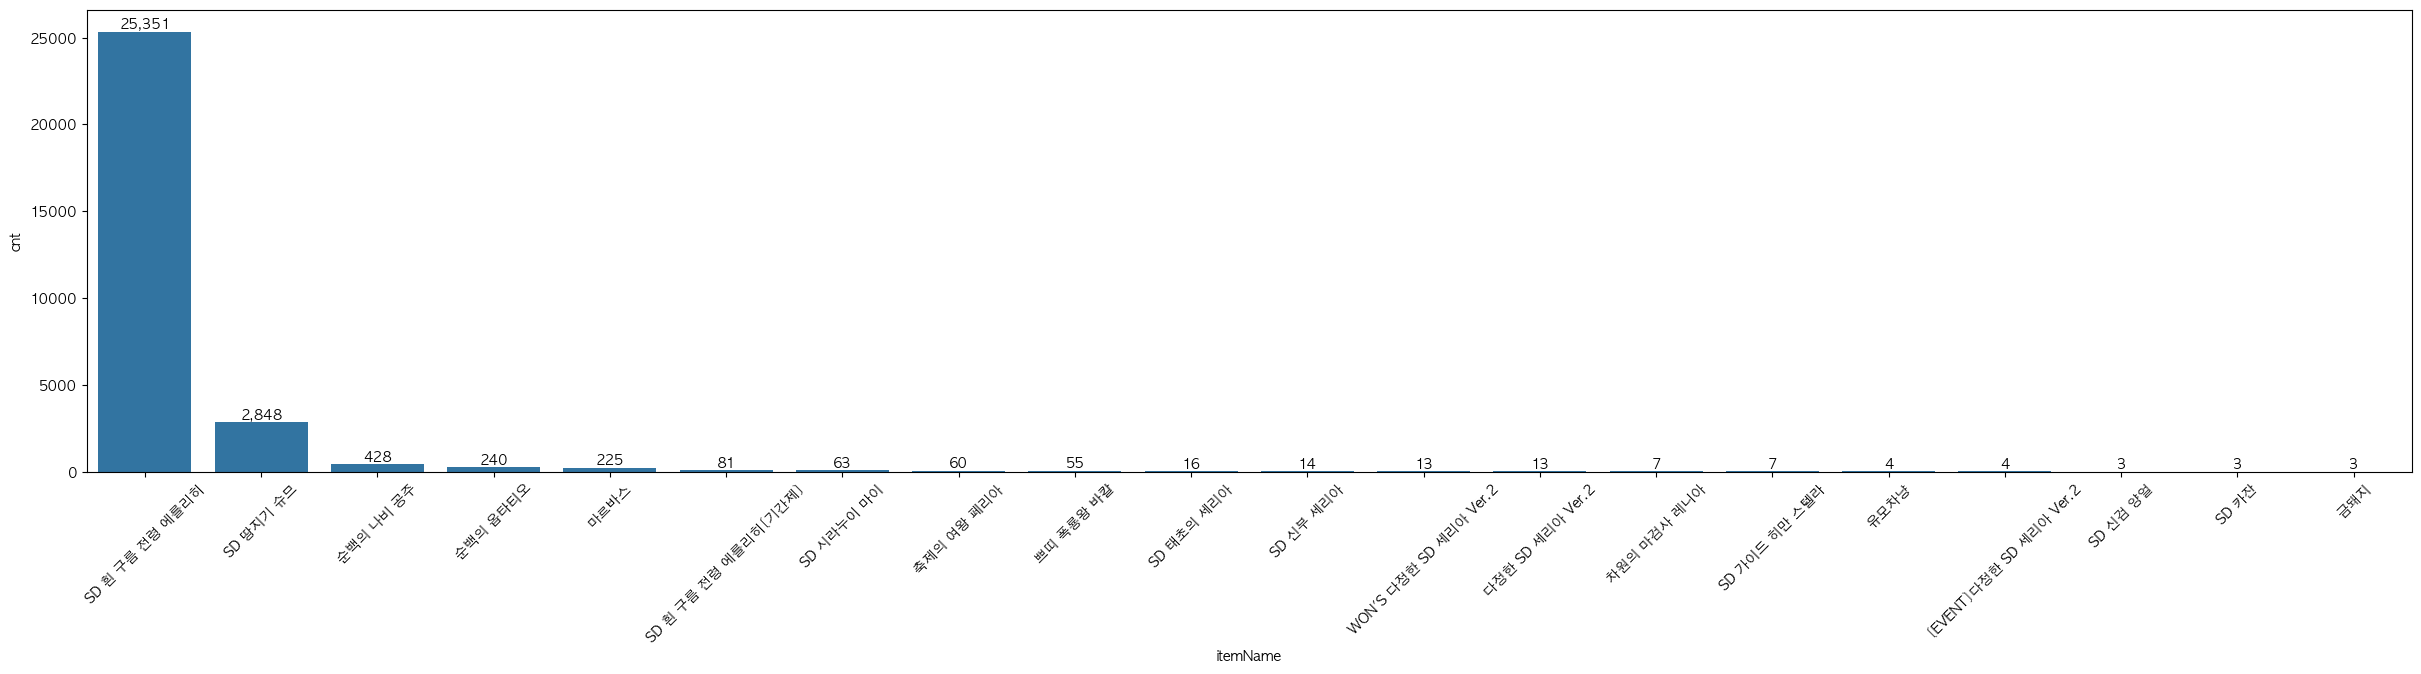

In [20]:
# 상위 30,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:30000]['characterId'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

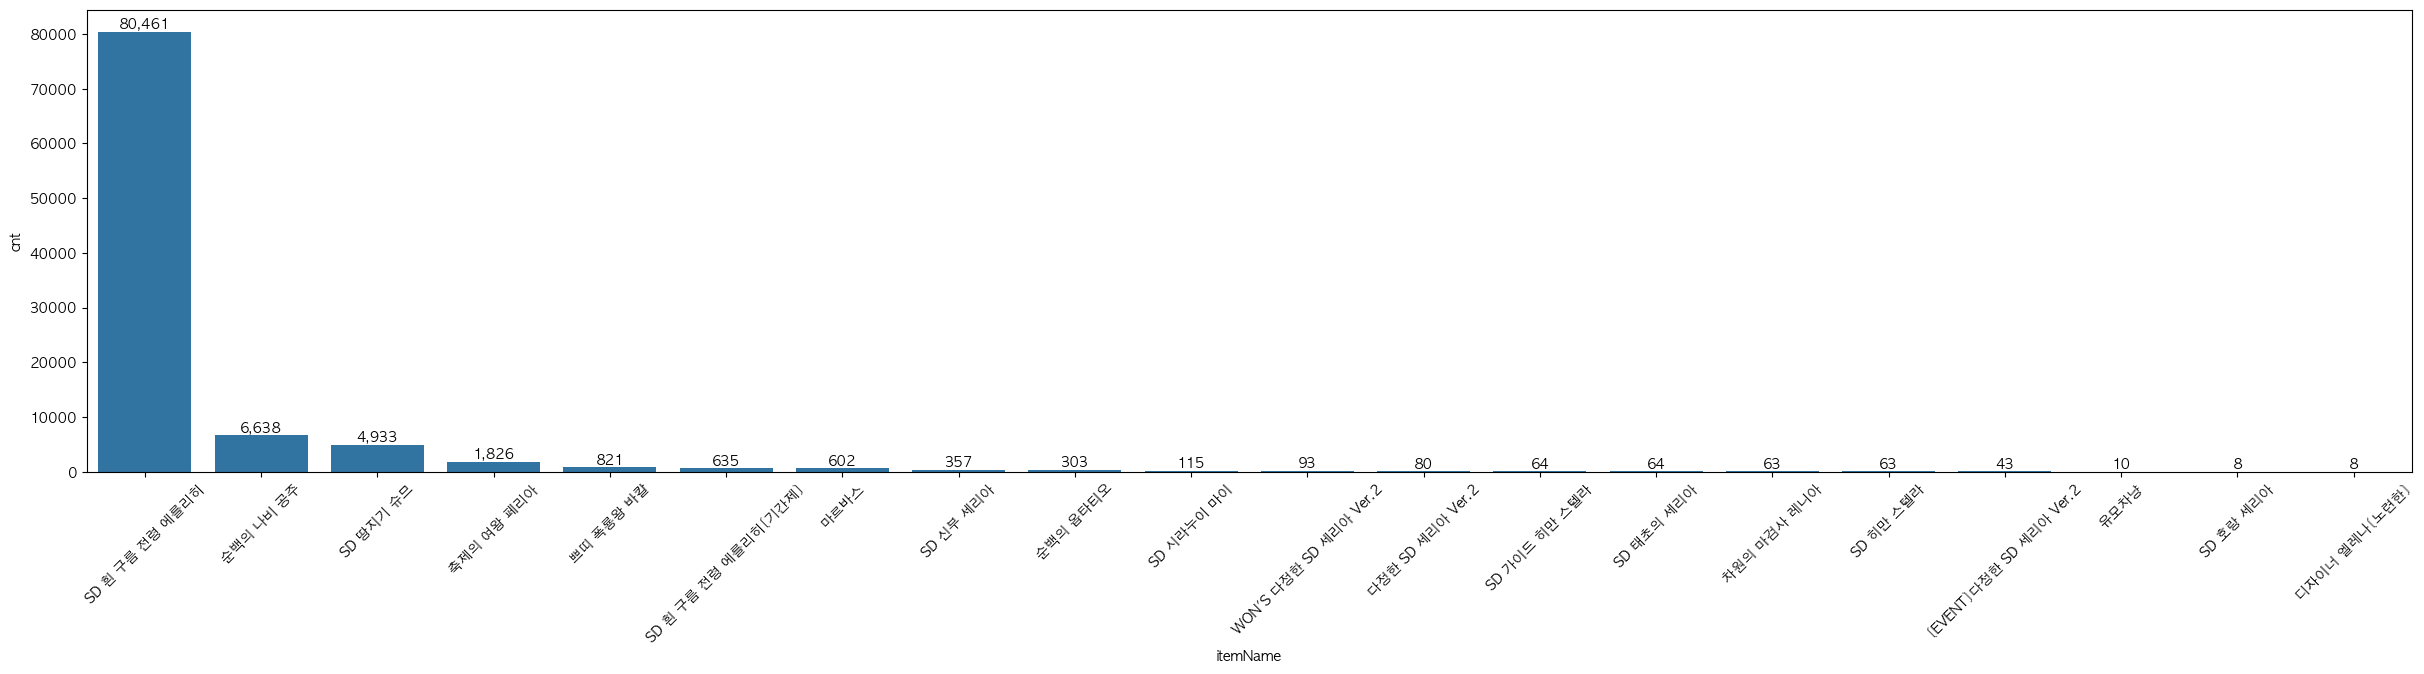

In [21]:
# 상위 100,000
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:100000]['characterId'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

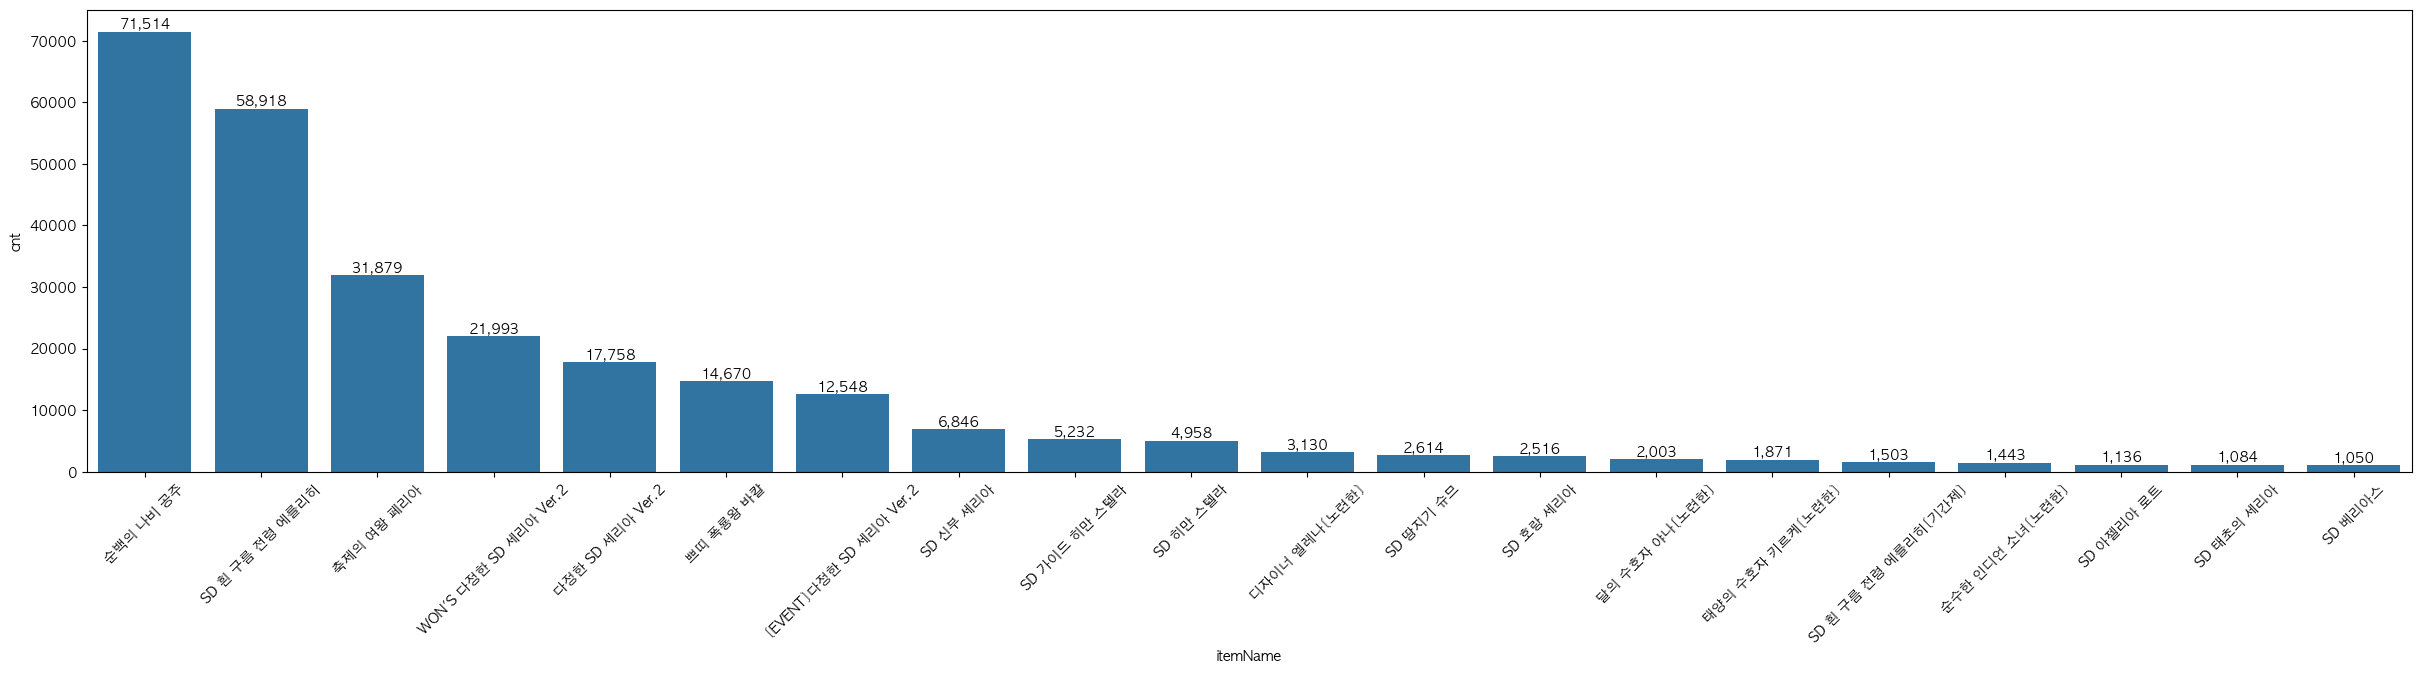

In [22]:
# 그외
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[100001:]['characterId'].values

cnt_df = pd.DataFrame(df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20]).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:20]['itemName']
y_label = cnt_df[:20]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

In [23]:
from collections import defaultdict
ratios = defaultdict(list)

for slice_point in range(10000,500001,50000):
    rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:slice_point]['characterId'].values
    tmp = df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20].reset_index()[:20] 
    tmp['ratio'] = round(tmp['count']/(tmp['count'].sum()), 4)

    for idx, row in tmp.iterrows():
        ratios[row['itemName']].append(row['ratio'])

rankers_ids = user_infos.sort_values('char_fame', ascending=False)['characterId'].values
tmp = df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:20].reset_index()[:20]
tmp['ratio'] = round(tmp['count']/(tmp['count'].sum()), 4)

for idx, row in tmp.iterrows():
        ratios[row['itemName']].append(row['ratio'])

In [24]:
ratios.keys()

dict_keys(['SD 흰 구름 전령 에를리히', 'SD 땅지기 슈므', '순백의 옵타티오', '마르바스', '순백의 나비 공주', 'SD 시라누이 마이', 'SD 흰 구름 전령 에를리히[기간제]', '쁘띠 폭룡왕 바칼', '축제의 여왕 페리아', "WON'S 다정한 SD 세리아 Ver.2", 'SD 태초의 세리아', 'SD 가이드 히만 스텔라', '유모차냥', 'SD 카잔', '다정한 SD 세리아 Ver.2', 'SD 야가미 이오리', '금돼지', 'SD 몰레크[강인한]', '[NEW]핫섬머 SD여프리스트 크리쳐', '은돼지', 'SD 신부 세리아', '차원의 마검사 레니아', '[EVENT]다정한 SD 세리아 Ver.2', 'SD 히만 스텔라', '디자이너 엘레나[노련한]', 'SD 호랑 세리아', 'SD 루나[기간제]', 'RB Ver.P', '태양의 수호자 키르케[노련한]', '달의 수호자 야나[노련한]', '순수한 인디언 소녀[노련한]', 'SD 아젤리아 로트', 'SD 베리아스'])

In [25]:
rankers_ids = user_infos.sort_values('char_fame', ascending=False)[:10000]['characterId'].values
df[df['characterId'].isin(rankers_ids)]['itemName'].value_counts()[:10]

itemName
SD 흰 구름 전령 에를리히           7942
SD 땅지기 슈므                 1494
순백의 옵타티오                   187
마르바스                        68
순백의 나비 공주                   50
SD 시라누이 마이                  31
SD 흰 구름 전령 에를리히[기간제]        16
쁘띠 폭룡왕 바칼                    9
축제의 여왕 페리아                   8
WON'S 다정한 SD 세리아 Ver.2       5
Name: count, dtype: int64

In [26]:
gasungbi = creature_info[creature_info['모험가 명성'] == 810]['itemName'].values
gasungbi

array(['SD 가이드 히만 스텔라', "WON'S 다정한 SD 세리아 Ver.2", '다정한 SD 세리아 Ver.2',
       '[EVENT]다정한 SD 세리아 Ver.2', 'SD 계곡의 파수꾼 루갈루', 'SD 큰 어른 루톤',
       'SD 루나[기간제]', 'SD 계곡 감시자 렐'], dtype=object)

In [27]:
gasungbi = creature_info[creature_info['모험가 명성'] == 810]['itemName'].values
gasungbi_array = np.array([float(0) for _ in range(11)])
for col in gasungbi:
    if len(ratios[col]) != 11 : continue
    gasungbi_array += np.array(ratios[col])

In [28]:
plot_data = {
    '신규 종결 크리쳐' : np.array(ratios['SD 흰 구름 전령 에를리히']) + np.array(ratios['SD 땅지기 슈므']) + np.array(ratios['SD 흰 구름 전령 에를리히[기간제]']),
    '이전 종결 크리쳐' : np.array(ratios['순백의 나비 공주']) + np.array(ratios['축제의 여왕 페리아']) + np.array(ratios['쁘띠 폭룡왕 바칼']),
    # '신규 종결 크리쳐[기간제]' : np.array(ratios['SD 흰 구름 전령 에를리히[기간제]']),
    '가성비 크리쳐' : gasungbi_array
}

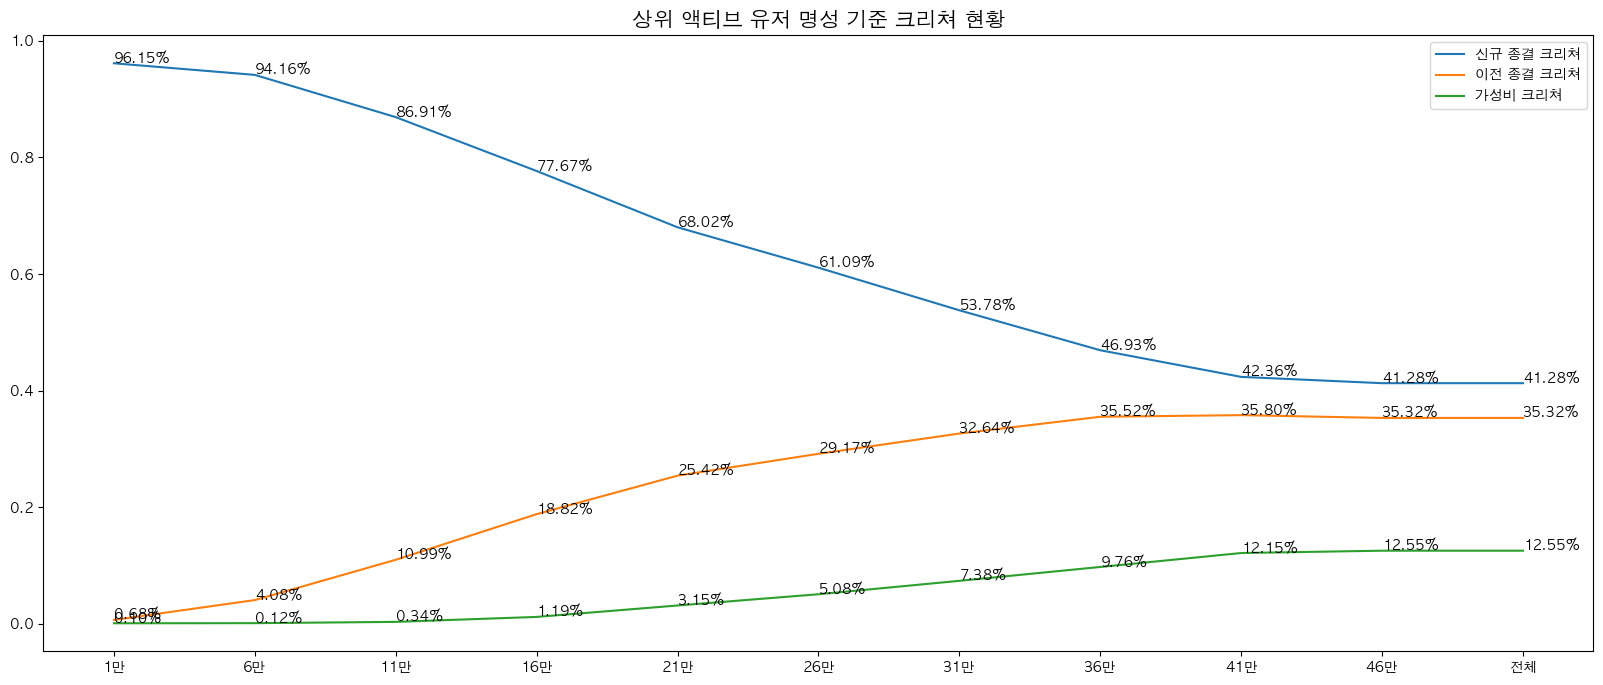

In [29]:
plt.figure(figsize=(20,8))

x = [f'{i}만' for i in range(1,51, 5)] + ['전체']

for (key, values) in (plot_data.items()):
    sns.lineplot(x = x, y=values, label = key)
    for idx, value in enumerate(values):
        plt.text(idx, value, f'{value:.2%}')

plt.title('상위 액티브 유저 명성 기준 크리쳐 현황', fontsize=15)
plt.show()

## 주요 크리쳐 거래 현황

In [31]:
new_creature_sume = pd.read_csv('./data/creature/trade/슈므_trade.csv')
new_creature_eli = pd.read_csv('./data/creature/trade/에를리히_trade.csv')
old_creature_feria = pd.read_csv('./data/creature/trade/페리아_trade.csv')
old_creature_white_bf = pd.read_csv('./data/creature/trade/순백의 나비_trade.csv')
seria = pd.read_csv('./data/creature/trade/다정한 세리아 알_trade.csv')

In [32]:
def make_plot_data(data):
    data['soldDate'] = pd.to_datetime(data['soldDate'])
    price = data.set_index('soldDate').resample('1D')['unitPrice'].mean().reset_index()
    cnt = data.set_index('soldDate').resample('1D')['count'].count().reset_index()
    price['unitPrice'] = price['unitPrice'].astype('float32')
    df = pd.merge(price, cnt, on='soldDate', how='inner')
    df = df[df['soldDate'] > '2024-03-11']
    return df.reset_index(drop=True)


In [33]:
# new_creature_eli['soldDate'] = pd.to_datetime(new_creature_eli['soldDate'])

eli_df = make_plot_data(new_creature_eli)
sume_df = make_plot_data(new_creature_sume)
old_creature_feria_df = make_plot_data(old_creature_feria)
old_creature_white_bf_df = make_plot_data(old_creature_white_bf)
seria_df = make_plot_data(seria)

In [34]:
def draw_sold_price_quantity(df_raw):
    def format_with_commas(value, _):
        return "{:,.0f}".format(value)
    
    x_values = df['soldDate'].dt.strftime('%m-%d %H:%M')
    
    x = [i for i in range(len(x_values))]

    fig, ax1 = plt.subplots(figsize=(20,6))
    sns.barplot(data=df, x = x, y = 'count', ax = ax1, label = '판매 수량')
    ax1.set_ylabel('판매수량', color='b')
    ax1.tick_params('y', colors='b')

    # # 두 번째 Y축에 대한 플로팅
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x = x, y = 'unitPrice', ax = ax2, label = '평균 판매 가격', color='r', marker='o')
    ax2.set_ylabel('평균 판매 가격', color='r')
    ax2.tick_params('y', colors='r')
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

    # # 범례 추가
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend().set_visible(False)  # 범례 숨기기
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    ax1.set_xticks(x, labels=x_values)

    plt.xticks(rotation=45)
    # 그래프 제목
    plt.title('날짜별 크리쳐 판매수량과 평균 가격')
    plt.show()

In [35]:
# 개별 확인 코드
# draw_sold_price_quantity(eli_df)
# draw_sold_price_quantity(sume_df)
# draw_sold_price_quantity(old_creature_white_bf_df)
# draw_sold_price_quantity(old_creature_feria_df)
# draw_sold_price_quantity(seria_df)


In [36]:
new_creature = [eli_df, sume_df]
old_creature = [old_creature_feria_df, old_creature_white_bf_df]
cos_eff_creature = [seria_df]

creature_groups = [new_creature, old_creature, cos_eff_creature]

In [53]:
def concat_group(group_lst):
    soldDate = group_lst[0]['soldDate']
    soldCnt = np.array([0 for _ in range(len(group_lst[0]))])

    df = group_lst[0]
    for group in group_lst[1:]:
        df = pd.merge(df, group, how='outer', on='soldDate').fillna(0)
    
    cols = [col for col in df.columns if 'count' in col]
    
    for col in cols:
        df[col] = df[col].astype('int')
        soldCnt += df[col].values
    
    return pd.DataFrame({
        'soldDate' : soldDate,
        'count' : soldCnt
    })


In [54]:
concat_groups = []
for creature_group in creature_groups:
    concat_groups.append(concat_group(creature_group))

/var/folders/mt/dvph4cf16z77j3829cw2yk040000gn/T/ipykernel_2900/415565539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['weekday'] = tmp['soldDate'].dt.dayofweek


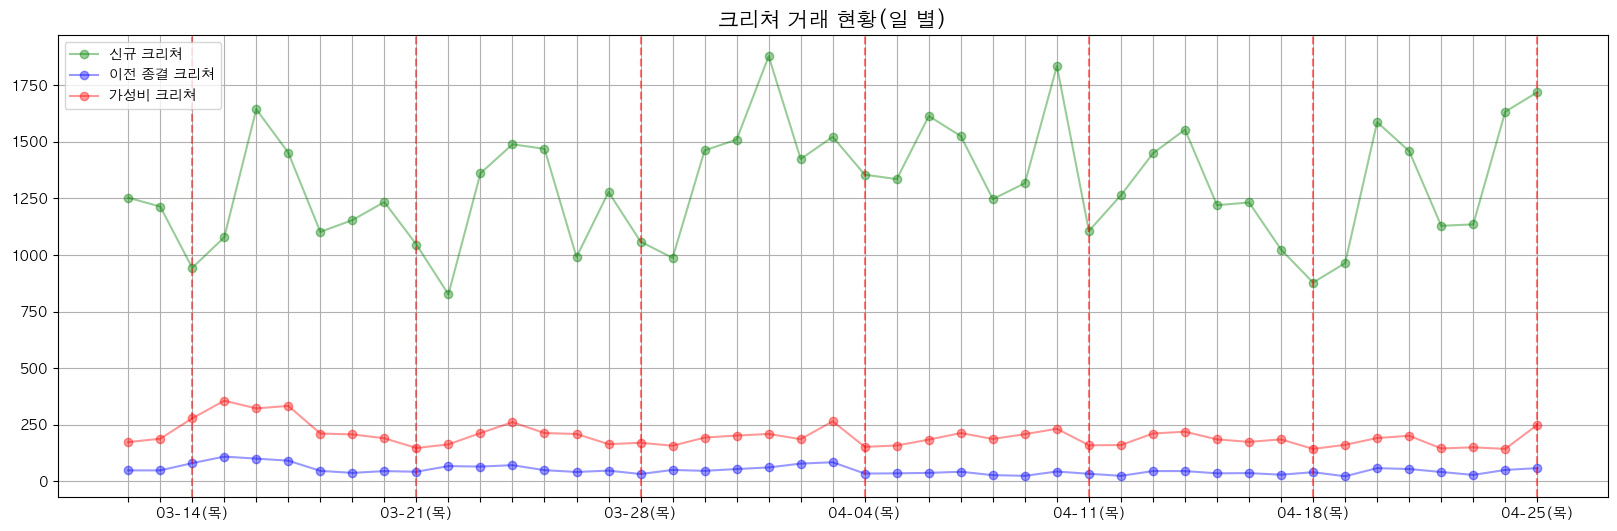

In [66]:
# 크리쳐 그룹군 판매 현황(일자 순서대로 그리기)


index = np.arange(len(concat_groups[0][concat_groups[0]['soldDate'] < '2024-04-26']['soldDate']))
labels = ['신규 크리쳐', '이전 종결 크리쳐', '가성비 크리쳐']

plt.figure(figsize=(20,6))

weekday_names = ['월', '화', '수', '목', '금', '토', '일']
colors = ['g','b','r']

for idx, concat_df in enumerate(concat_groups):
    tmp = concat_df[concat_df['soldDate'] < '2024-04-26']
    tmp['weekday'] = tmp['soldDate'].dt.dayofweek
    plt.plot(index , tmp['count'], color = colors[idx], alpha=0.4, label = labels[idx], marker='o')
    
    # for idx2, y in enumerate(concat_df["count"].values):
    #     plt.text(idx2, y*1.005, f'{y:,}', fontsize=12, color='black', ha='center', va='bottom')

x_ticks = [f"{str(value['soldDate'])[5:10]}({weekday_names[value['weekday']]})" for idx, value in tmp.iterrows()]


# index = np.arange(len(concat_groups[0]['soldDate']))
interval = len(index) // 7 + 1  # 데이터 포인트에 따라 간격 조정
selected_ticks = [x_ticks[i+2] if i % interval == 0 else '' for i in range(len(x_ticks))]
selected_ticks = selected_ticks[-2:] + selected_ticks[:-2]

plt.xticks(np.arange(len(index)), selected_ticks)

# index 배열과 selected_ticks 를 기반으로 x축에 세로 라인을 그립니다.
for i in range(len(index)):
    if selected_ticks[i]:  # selected_ticks가 빈 문자열이 아닌 경우에만 라인을 그립니다.
        plt.axvline(x=i, color='r', linestyle='--', alpha=0.5)  # 세로 라인 추가


plt.title('크리쳐 거래 현황(일 별)', fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()

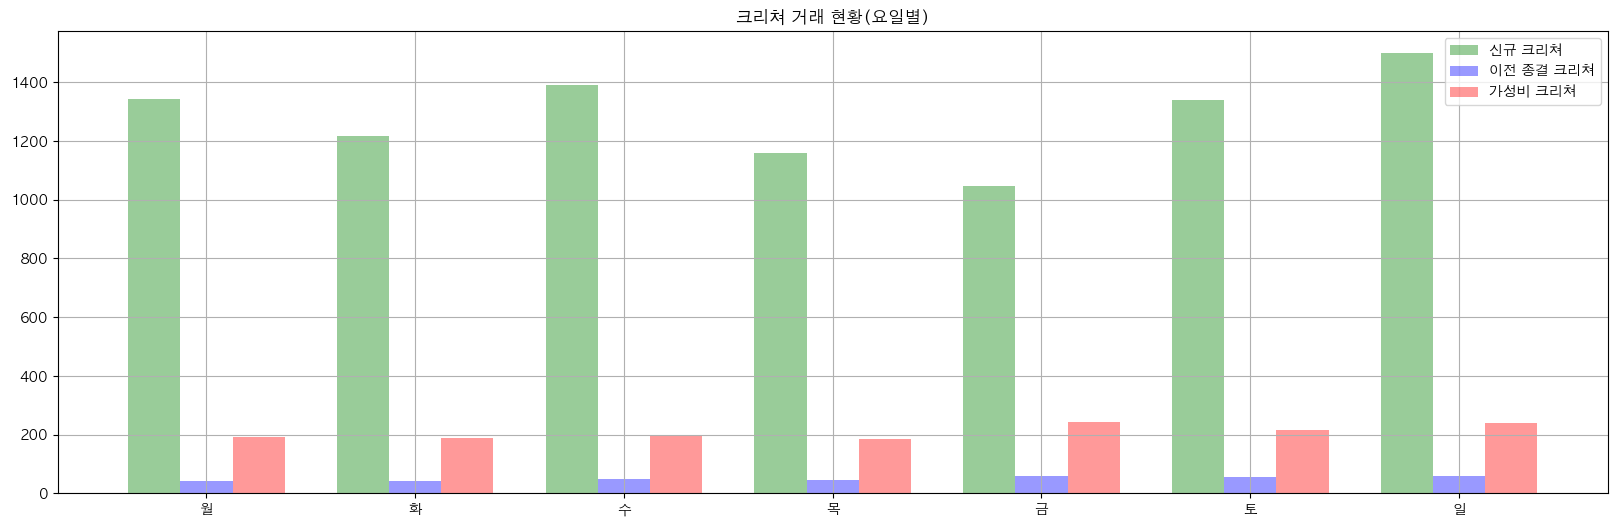

In [59]:
# 크리쳐 그룹군 판매 현황(요일별로 그리기)

# 각 날짜의 요일을 찾아 새로운 열에 추가합니다. (월요일=0, 일요일=6)

fig, ax1 = plt.subplots(figsize=(20,6))

weekday_names = ['월', '화', '수', '목', '금', '토', '일']
index = np.arange(len(weekday_names))
colors = ['g','b','r']
bar_width = 0.25


for idx, concat_df in enumerate(concat_groups):
    concat_df['weekday'] = concat_df['soldDate'].dt.dayofweek
    weekday_avg = concat_df.groupby('weekday')['count'].mean()
    plt.bar(index + (bar_width*idx) , weekday_avg, bar_width, color = colors[idx], alpha=0.4, label = labels[idx])

ax1.set_xticks(np.arange(bar_width, len(weekday_names) + bar_width, 1), weekday_names)

# matplotlib을 사용해 요일별 평균 판매량을 그래프로 나타냅니다.
plt.title('크리쳐 거래 현황(요일별)')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
# plt.xticks(rotation=45)
plt.legend()
plt.show()



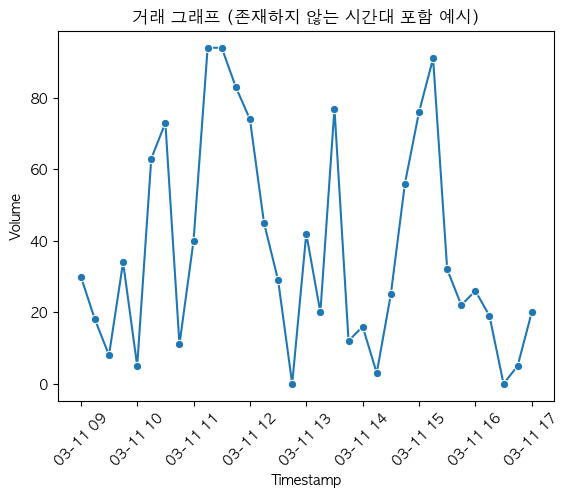

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

# 존재하지 않는 시간대를 포함한 가상의 거래 데이터 생성
def generate_sample_data(start_time, end_time, interval_minutes):
    current_time = start_time
    data = {'Timestamp': [], 'Volume': []}

    while current_time <= end_time:
        # 80% 확률로 거래가 발생하도록 설정
        if random.random() < 0.8:
            data['Timestamp'].append(current_time)
            data['Volume'].append(random.randint(1, 100))
        
        current_time += timedelta(minutes=interval_minutes)

    return pd.DataFrame(data)

# 시작 시간 및 간격 설정
start_time = datetime(2024, 3, 11, 9, 0, 0)  # 예시 시작 시간
end_time = datetime(2024, 3, 11, 17, 0, 0)    # 예시 종료 시간
interval_minutes = 15  # 15분 간격으로 데이터 생성

# 존재하지 않는 시간대를 포함한 데이터 생성
sample_data = generate_sample_data(start_time, end_time, interval_minutes)

# 시간을 기준으로 데이터 정렬
sample_data = sample_data.sort_values('Timestamp')

# 빈 시간대를 포함하여 모든 시간대 생성
all_timestamps = pd.date_range(start=start_time, end=end_time, freq=f'{interval_minutes}T')

# 빈 시간대를 추가하여 완전한 데이터셋 생성
complete_data = pd.DataFrame({'Timestamp': all_timestamps})
complete_data = pd.merge(complete_data, sample_data, on='Timestamp', how='left')
complete_data['Volume'].fillna(0, inplace=True)

# Seaborn을 사용하여 그래프 그리기
sns.lineplot(x='Timestamp', y='Volume', data=complete_data, marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.title('거래 그래프 (존재하지 않는 시간대 포함 예시)')
plt.xticks(rotation=45)
plt.show()


## 모험단 정보 추가

In [68]:
user_creature_info['adventureName'].nunique()

148631

In [14]:
user_creature_info = pd.merge(df, user, how='inner', on = 'characterId' )

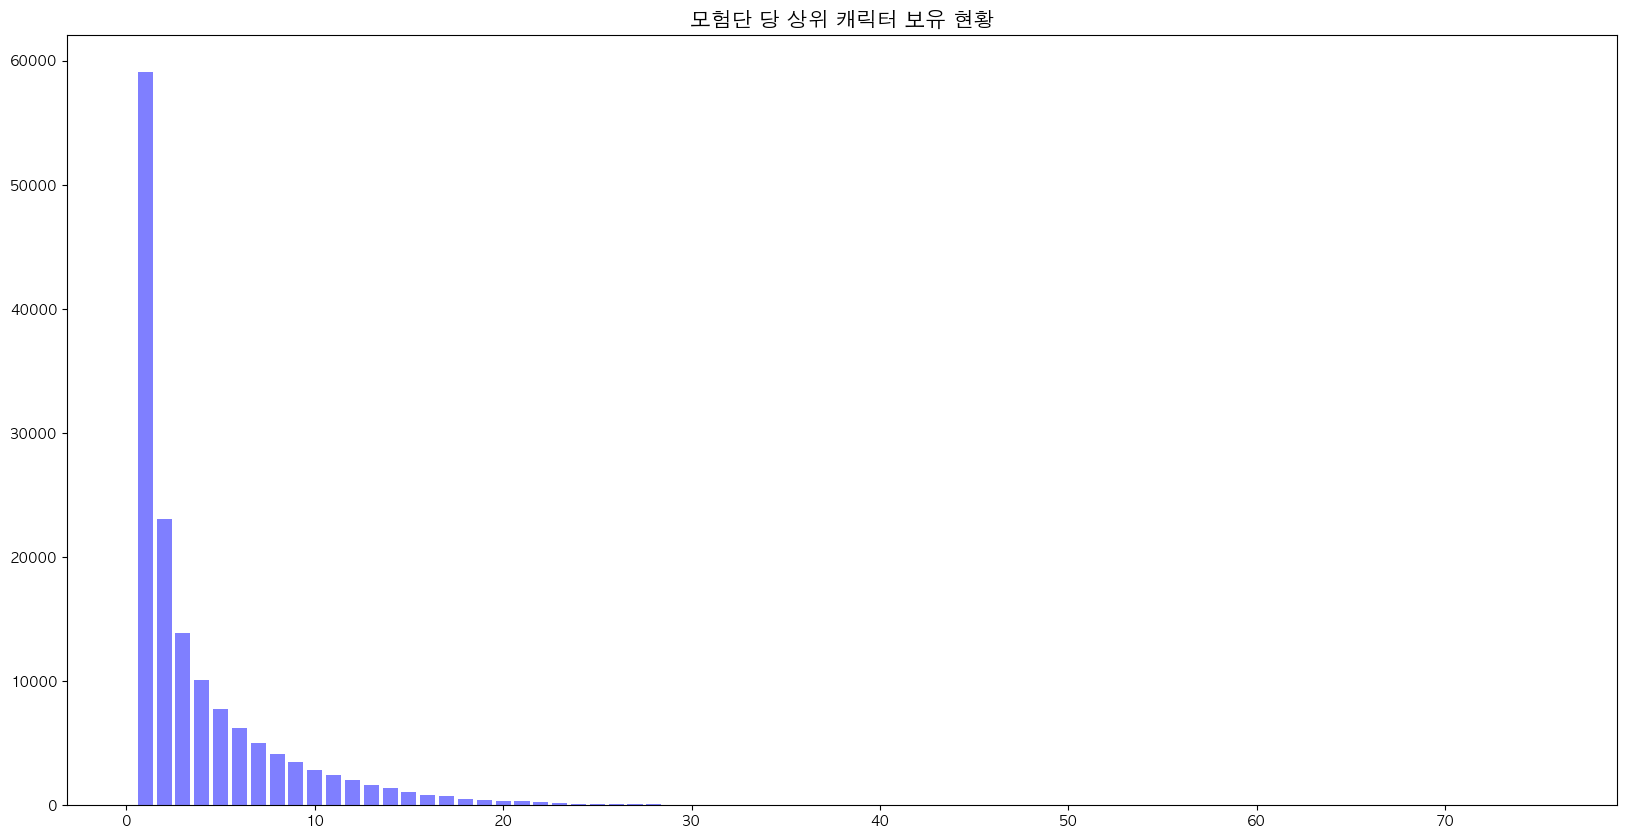

In [15]:
# 모험단 당 상위 그룹 캐릭터 분포

plt.figure(figsize=(20,10))
plt_df = user_creature_info.groupby('adventureName')['characterId'].count().value_counts()
plt.bar(plt_df.index, plt_df.values, color='b', alpha = 0.5)
plt.title('모험단 당 상위 캐릭터 보유 현황', fontsize=15)
plt.show()

In [16]:
# 상위 액티브 캐릭터에서 캐릭터가 2개 이상인 모험단중 가장 높은 명성 캐릭터 제외
adventure_df = user_creature_info[['adventureName','characterId','itemName','char_fame']]
adventure_multi_group_exclue_df = adventure_df.groupby('adventureName').apply(lambda x: x[x['char_fame'] < x['char_fame'].max()])


/var/folders/mt/dvph4cf16z77j3829cw2yk040000gn/T/ipykernel_2900/2039818952.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adventure_multi_group_exclue_df = adventure_df.groupby('adventureName').apply(lambda x: x[x['char_fame'] < x['char_fame'].max()])


In [17]:
# 상위 액티브 캐릭터에서 캐릭터가 1개인 모험단
filter_df = adventure_df['adventureName'].value_counts().reset_index()
filter = filter_df[filter_df['count'] == 1]['adventureName'].values
multi_advens = adventure_multi_group_exclue_df['adventureName'].unique()


adventure_single_group_df = adventure_df[adventure_df['adventureName'].isin(filter)]
adventure_multi_group_df = adventure_df[adventure_df['adventureName'].isin(multi_advens)]

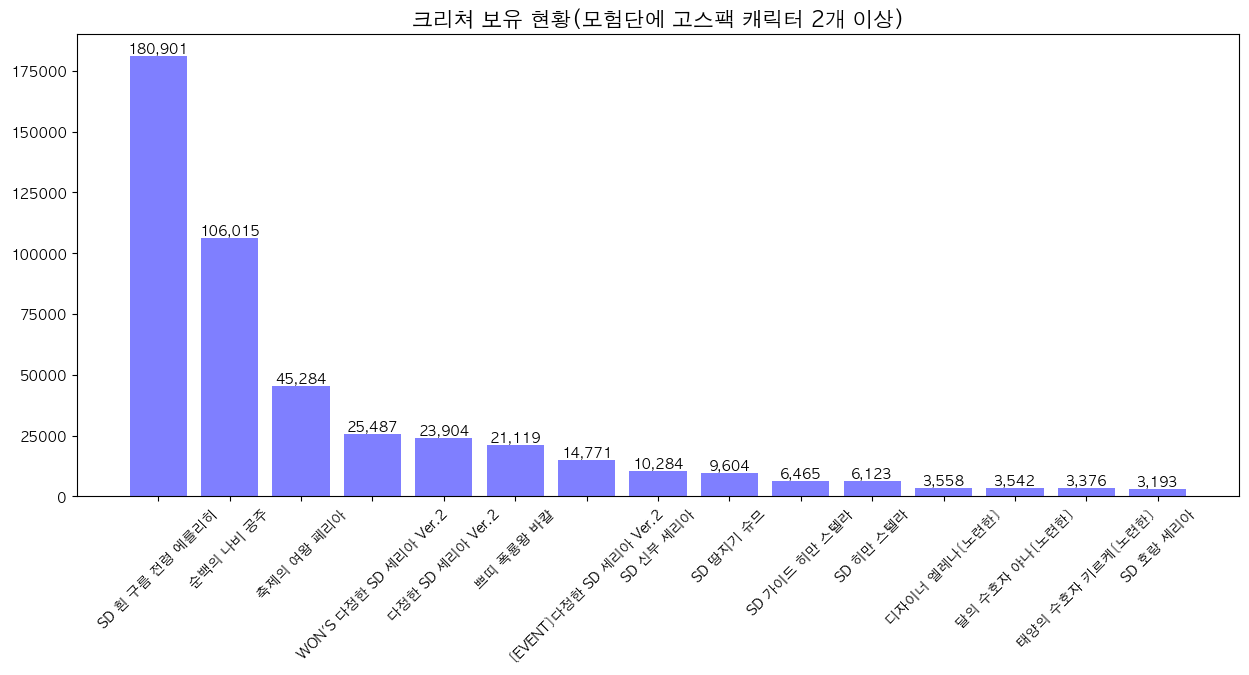

In [18]:
cnt_df = pd.DataFrame(adventure_multi_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
plt.bar( x_label, y_label, color='b', alpha = 0.5)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.title('크리쳐 보유 현황(모험단에 고스팩 캐릭터 2개 이상)', fontsize=15)
plt.xlabel('')
plt.ylabel('')

plt.show()

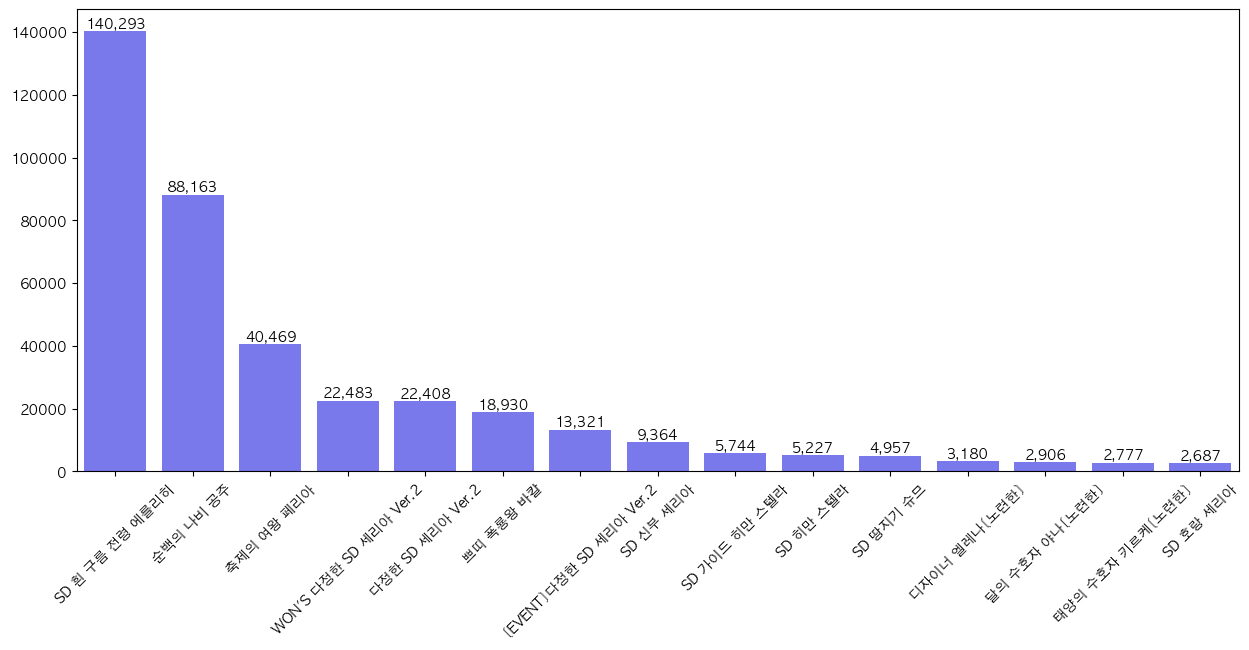

In [19]:
cnt_df = pd.DataFrame(adventure_multi_group_exclue_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label, color = 'b', alpha=0.6)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

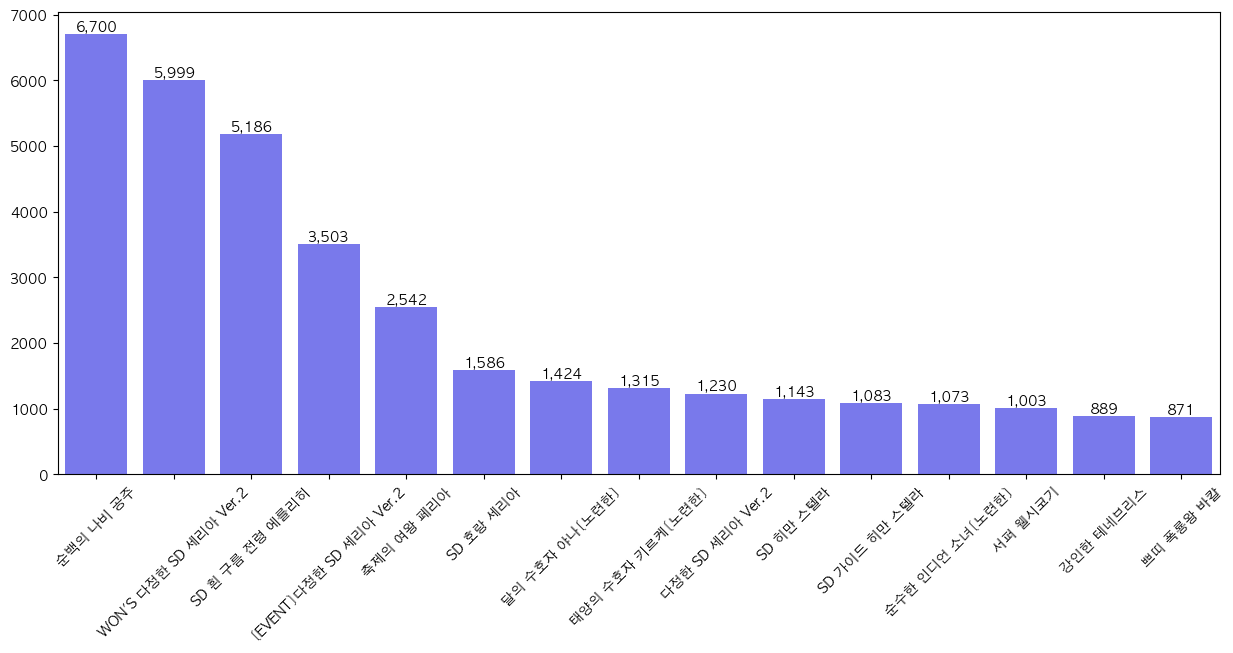

In [25]:
cnt_df = pd.DataFrame(adventure_single_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(15,6))
x_label = cnt_df[:15]['itemName']
y_label = cnt_df[:15]['cnt']
sns.barplot(x = x_label, y = y_label, color='blue', alpha = 0.6)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('')

plt.show()

In [29]:
def make_creature_group(df):
    
    group = ['이전 종결(순백나비 + 페리아)', '신규 크리쳐(에를리히 + 슈므)', '가성비(세리아)', '그 외']
    total_x, total_y = [], []
    
    # 이전 종결
    tmp = df[df['itemName'].isin(['순백의 나비 공주', '축제의 여왕 페리아'])]
    
    total_x.append(tmp['cnt_x'].sum())
    total_y.append(tmp['cnt_y'].sum())
    
    # 신규 종결
    tmp = df[df['itemName'].isin(['SD 흰 구름 전령 에를리히', 'SD 땅지기 슈므'])]
    
    total_x.append(tmp['cnt_x'].sum())
    total_y.append(tmp['cnt_y'].sum())
    
    # 이전 종결
    tmp = df[df['itemName'].isin(['다정한 SD 세리아 Ver.2', "WON'S 다정한 SD 세리아 Ver.2", '[EVENT]다정한 SD 세리아 Ver.2', 'SD 신부 세리아'])]
    
    total_x.append(tmp['cnt_x'].sum())
    total_y.append(tmp['cnt_y'].sum())
    
    # etc
    
    tmp = df[df['itemName'].isin(creature_info[creature_info['모험가 명성'] < 810]['itemName'].values)]
    
    total_x.append(tmp['cnt_x'].sum())
    total_y.append(tmp['cnt_y'].sum())
    
    group_df = pd.DataFrame({
        'itemName' : group,
        'cnt_x' : total_x,
        'cnt_y' : total_y
    })
    
    return group_df

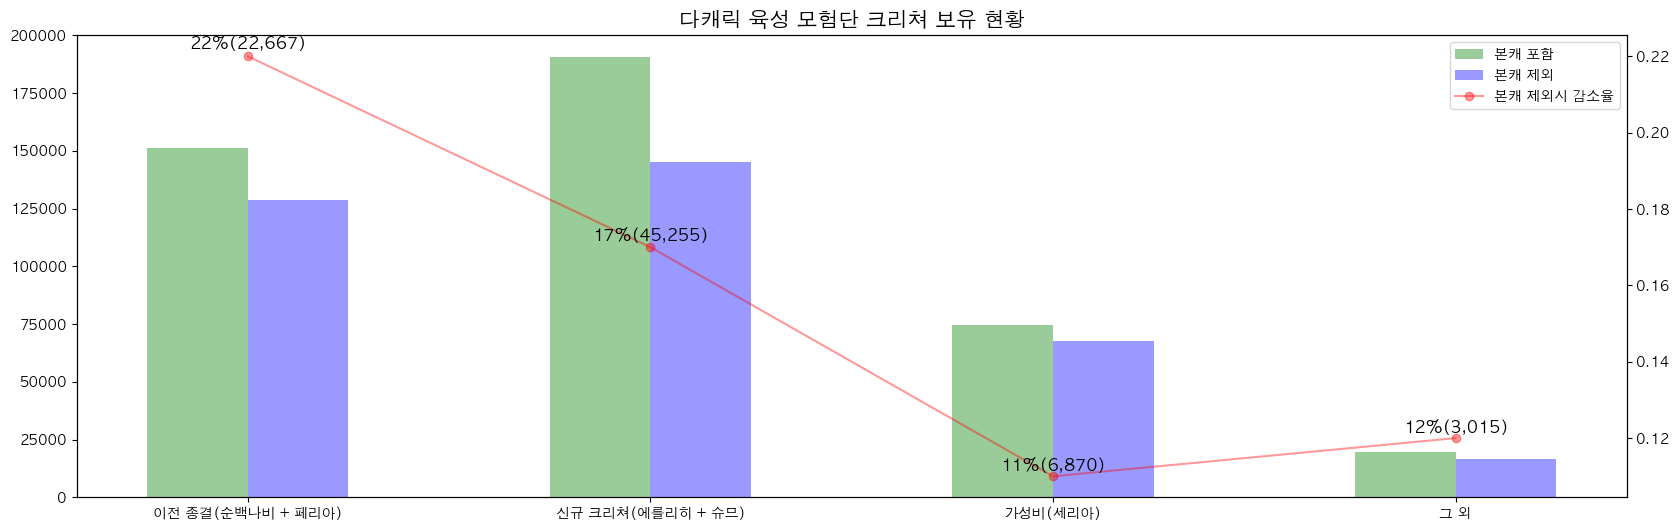

In [30]:
cnt_df = pd.DataFrame(adventure_multi_group_df['itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

cnt_df2 = pd.DataFrame(adventure_multi_group_exclue_df['itemName'].value_counts()).reset_index()
cnt_df2.columns = ['itemName','cnt']
tmp = cnt_df2[cnt_df2['itemName'].isin(cnt_df[:15]['itemName'].values)]
cnt_df = pd.merge(cnt_df, tmp, how = 'inner', on='itemName')

group_df = make_creature_group(cnt_df)
group_df['감소율'] = round(1 -cnt_df['cnt_y'] / cnt_df['cnt_x'], 2)

bar_width = 0.25  # 각 바의 너비

index = np.arange(len(group_df))

#plt.figure(figsize=(20,6))
fig, ax1 = plt.subplots(figsize=(20,6))

plt.bar(index , group_df['cnt_x'], bar_width, color = 'g', alpha=0.4, label = '본캐 포함')
plt.bar(index + bar_width , group_df['cnt_y'], bar_width, color = 'b', alpha=0.4 , label = '본캐 제외')

ax2 = ax1.twinx()
plt.plot(index + bar_width/2 , group_df['감소율'], color='r', alpha=0.4, label = '본캐 제외시 감소율', marker='o')

for idx, y in enumerate(group_df['감소율'].values):
    plt.text(idx+(bar_width/2), y*1.005, f'{y:.0%}({group_df["cnt_x"].iloc[idx] - group_df["cnt_y"].iloc[idx]:,})', fontsize=12, color='black', ha='center', va='bottom')

ax1.set_xticks(np.arange(bar_width/2, len(group_df)-1 + bar_width, 1), group_df['itemName'].values,)

plt.title('다캐릭 육성 모험단 크리쳐 보유 현황', fontsize=15)
plt.xlabel('')
plt.ylabel('')

# # 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend().set_visible(False)  # 범례 숨기기
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

# 크리쳐 스킨

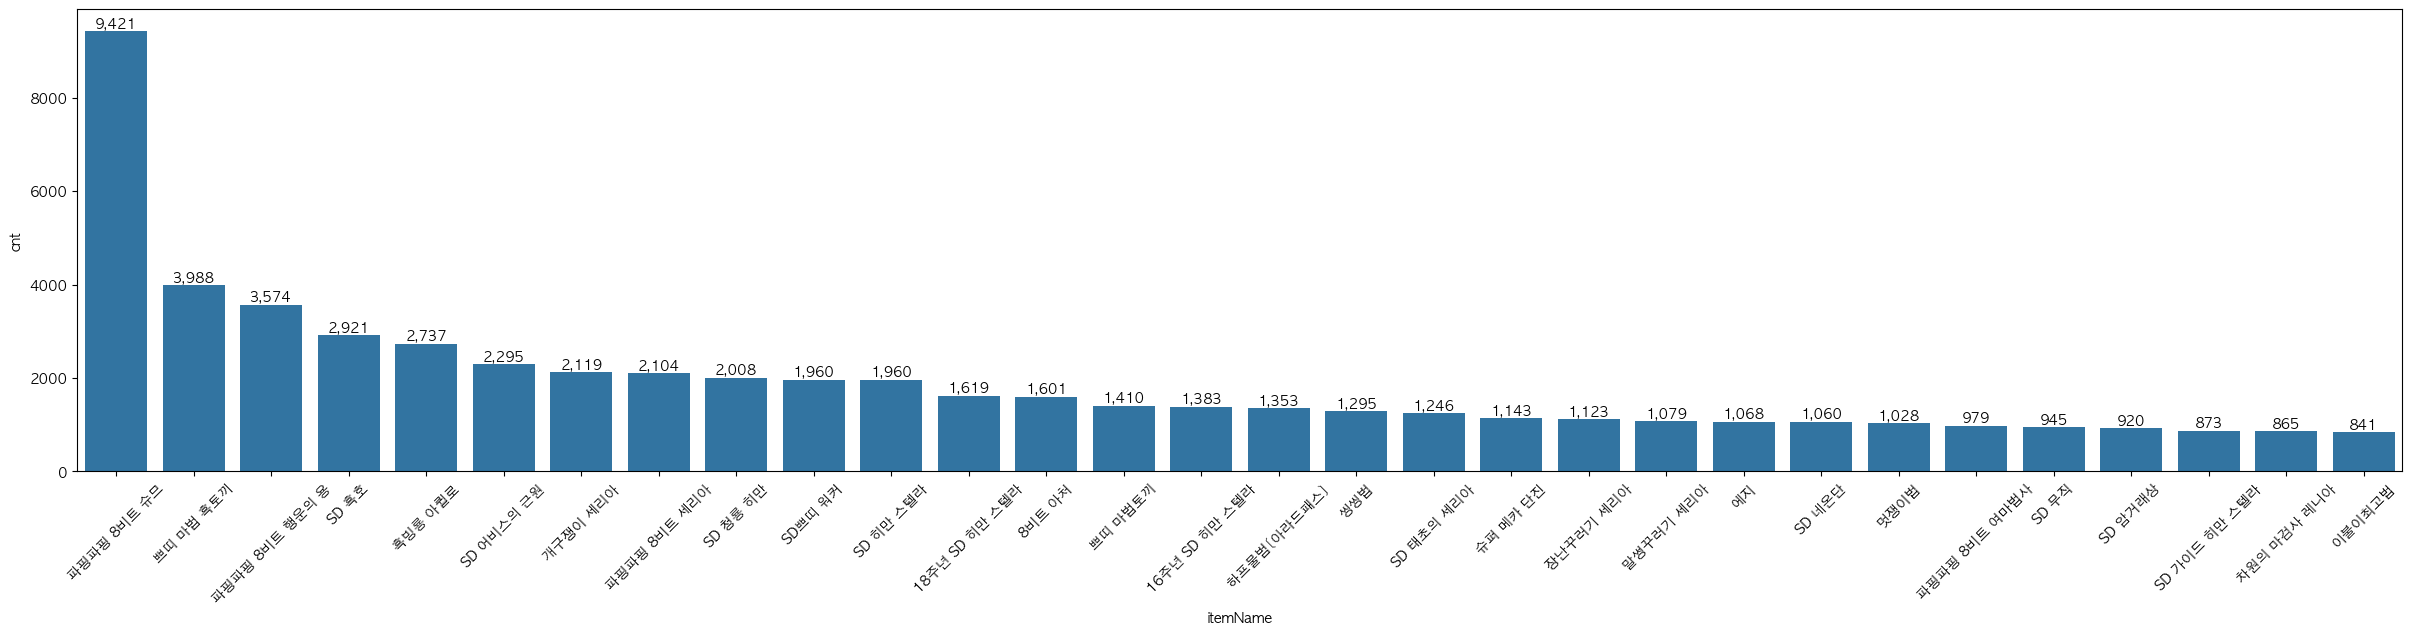

총 캐릭터 수 : 561,126
스킨 크리처 장착 수 : 119,422
크리처 종류 : 823
상위 30개 항목 : 56,918 (0.47600000000000003)


,itemName,cnt,ratio
0,파핑파핑 8비트 슈므,9421,0.079
1,쁘띠 마법 흑토끼,3988,0.033
2,파핑파핑 8비트 행운의 용,3574,0.030
3,SD 흑호,2921,0.024
4,흑빙룡 아퀼로,2737,0.023
5,SD 어비스의 근원,2295,0.019
6,개구쟁이 세리아,2119,0.018
7,파핑파핑 8비트 세리아,2104,0.018
8,SD 청룡 히만,2008,0.017
9,SD쁘띠 워커,1960,0.016


In [ ]:
cnt_df = pd.DataFrame(clone_creature['clone_itemName'].value_counts()).reset_index()
cnt_df.columns = ['itemName','cnt']

plt.figure(figsize=(30,6))
x_label = cnt_df[:30]['itemName']
y_label = cnt_df[:30]['cnt']
sns.barplot(x = x_label, y = y_label)
plt.xticks(rotation=45)
for idx, y in enumerate(y_label):
    plt.text(idx, y, f'{int(y):,}', fontsize=10, color='black', ha='center', va='bottom')
    
plt.show()

cnt_df['ratio'] = round(cnt_df['cnt']/cnt_df['cnt'].sum(),3)
print(f'총 캐릭터 수 : {len(df):,}')
print(f"스킨 크리처 장착 수 : {len(df[~df['clone_itemName'].isna()]):,}")
print(f'크리처 종류 : {len(cnt_df):,}')
print(f"상위 30개 항목 : {cnt_df[:30]['cnt'].sum():,} ({cnt_df[:30]['ratio'].sum()})")
cnt_df[:30]

In [ ]:
clone_creature[clone_creature['clone_itemName'] == '흑빙룡 아퀼로']

,serverId,characterId,clone_itemId,clone_itemName
17,hilder,d8bd19012871ea7a0b29416f4fdc119f,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
79,casillas,0cc61f2e2e7cc365e56db68a5fca6fe7,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
107,cain,9b0a02e4b84580fa2fb01d553b4e6584,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
118,siroco,dbbd64bc2c1e5cc1108f4962feea4666,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
208,cain,b8994fb7547b0a8807d318e8a97a5329,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
...,...,...,...,...
597163,prey,9170e4bde3d9cdc5d2fc57b6662ac06b,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
597236,diregie,af66a3c3151acdc0c0799ed321f88dc8,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
598115,cain,98ed6dad04f97016d4e453b7e8030146,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
598812,siroco,05b33785465e7fcb597cef203b0a528c,1d4546e609311ad35941b37c1edc4417,흑빙룡 아퀼로
